In [82]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingRegressor ,RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

data_banknote_authentication = pd.read_csv("data_banknote_authentication.csv")
glasstypePrediction = pd.read_csv("glasstypePrediction.csv")
housePricePrediction = pd.read_csv("housePricePrediction.csv")

# Data Preprocessing

In [83]:
# Check duplicates,missing values,types
data_banknote_authentication.duplicated().sum()
# Remove duplicates
data_banknote_authentication.drop_duplicates()
# Check types
data_banknote_authentication.dtypes
# Check missing values
data_banknote_authentication.isnull().sum()
# Apply scaling to features
scaler = StandardScaler()
target = data_banknote_authentication['Class']
features = data_banknote_authentication.drop('Class',axis = 1)
scaled_features = scaler.fit_transform(features)
scaled_df = pd.DataFrame(scaled_features, columns=features.columns)
scaled_data_banknote_authentication = pd.concat([scaled_df, target], axis=1)
scaled_data_banknote_authentication

,Variance_Wavelet,Skewness_Wavelet,Curtosis_Wavelet,Image_Entropy,Class
0,1.121806,1.149455,-0.975970,0.354561,0
1,1.447066,1.064453,-0.895036,-0.128767,0
2,1.207810,-0.777352,0.122218,0.618073,0
3,1.063742,1.295478,-1.255397,-1.144029,0
4,-0.036772,-1.087038,0.736730,0.096587,0
...,...,...,...,...,...
1367,-0.009711,-0.097693,-0.660962,0.300996,1
1368,-0.641313,-1.158984,1.179023,0.730127,1
1369,-1.472357,-2.621646,3.759017,-0.754884,1
1370,-1.406693,-1.756471,2.552043,-0.043158,1


In [84]:
# Check duplicates,missing values,types
glasstypePrediction.duplicated().sum()
# Remove duplicates
glasstypePrediction.drop_duplicates()
# Check types
glasstypePrediction.dtypes
# Check missing values
glasstypePrediction.isnull().sum()
# Apply scaling to features
scaler = StandardScaler()
target = glasstypePrediction['Type']
features = glasstypePrediction.drop('Type',axis = 1)
scaled_features = scaler.fit_transform(features)
scaled_df = pd.DataFrame(scaled_features, columns=features.columns)
scaled_glasstypePrediction = pd.concat([scaled_df, target], axis=1)
scaled_glasstypePrediction

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451,1
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451,1
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451,1
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451,1
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451,1
...,...,...,...,...,...,...,...,...,...,...
209,-0.704815,0.898681,-1.865511,2.881125,-0.052974,-0.640968,0.157088,1.783978,-0.586451,7
210,-0.500178,1.856097,-1.865511,1.094342,0.529374,-0.763919,-0.392276,2.852405,-0.586451,7
211,0.754046,1.168721,-1.865511,1.154570,0.995252,-0.763919,-0.364103,2.953200,-0.586451,7
212,-0.612399,1.193270,-1.865511,0.993960,1.241133,-0.763919,-0.335931,2.812087,-0.586451,7


In [85]:
# Apply label encoding
label_encoder = LabelEncoder()

housePricePrediction['Encoded_POSTED_BY'] = label_encoder.fit_transform(housePricePrediction['POSTED_BY'])
housePricePrediction['Encoded_BHK_OR_RK'] = label_encoder.fit_transform(housePricePrediction['BHK_OR_RK'])
housePricePrediction = housePricePrediction.drop(['POSTED_BY','BHK_OR_RK','ADDRESS'],axis =1)

# Check duplicates,missing values,types
housePricePrediction.duplicated().sum()
# Remove duplicates
housePricePrediction.drop_duplicates()
# Check missing values
housePricePrediction.isnull().sum()
# Check types
housePricePrediction.dtypes

UNDER_CONSTRUCTION         int64
RERA                       int64
BHK_NO.                    int64
SQUARE_FT                float64
READY_TO_MOVE              int64
RESALE                     int64
LONGITUDE                float64
LATITUDE                 float64
TARGET(PRICE_IN_LACS)    float64
Encoded_POSTED_BY          int64
Encoded_BHK_OR_RK          int64
dtype: object

# **Model Implementation :**

# 1-Random Forest

Dataset 1

In [86]:
# Split Data into features and target
X = scaled_data_banknote_authentication.drop('Class',axis = 1)
Y = scaled_data_banknote_authentication['Class']

# Split Data into train and test sets
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

# Random forest model
Random_forest = RandomForestClassifier(n_estimators=100,random_state=42)
Random_forest.fit(x_train,y_train)
Random_forest_predictions = Random_forest.predict(x_test)
Random_forest_accuracy = accuracy_score(y_test,Random_forest_predictions)
print("Accuracy = ",Random_forest_accuracy*100)

Accuracy =  99.27272727272727


Dataset 2

In [87]:
# Split Data into features and target
X = scaled_glasstypePrediction.drop('Type',axis = 1)
Y = scaled_glasstypePrediction['Type']

# Split Data into train and test sets
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

# Random forest model
Random_forest = RandomForestClassifier(n_estimators=100,random_state=42)
Random_forest.fit(x_train,y_train)
Random_forest_predictions = Random_forest.predict(x_test)
Random_forest_accuracy = accuracy_score(y_test,Random_forest_predictions)
print("Accuracy = ",Random_forest_accuracy*100)

Accuracy =  83.72093023255815


Dataset 3

In [88]:
# Split Data into features and target
X = housePricePrediction.drop('TARGET(PRICE_IN_LACS)',axis = 1)
Y = housePricePrediction['TARGET(PRICE_IN_LACS)']

# Split Data into train and test sets
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

# Random forest model
Random_forest = RandomForestRegressor(n_estimators=100,random_state=42)
Random_forest.fit(x_train,y_train)
Random_forest_predictions = Random_forest.predict(x_test)
mse = mean_squared_error(y_test, Random_forest_predictions)
print('Mean Squared Error:', mse)

Mean Squared Error: 139932.7773360713


# 2-AdaBoost

Dataset 1

In [89]:
# Split Data into features and target
X = scaled_data_banknote_authentication.drop('Class',axis = 1)
Y = scaled_data_banknote_authentication['Class']

# Split Data into train and test sets
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

# Adaboost model
Adaboost = AdaBoostClassifier(n_estimators=100,random_state=42)
Adaboost.fit(x_train,y_train)
Adaboost_predictions = Adaboost.predict(x_test)
Adaboost_accuracy = accuracy_score(y_test,Adaboost_predictions)
print('Accuracy = ',Adaboost_accuracy*100)

Accuracy =  99.63636363636364


Dataset 2

In [90]:
# Split Data into features and target
X = scaled_glasstypePrediction.drop('Type',axis = 1)
Y = scaled_glasstypePrediction['Type']

# Split Data into train and test sets
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

# Adaboost model
Adaboost = AdaBoostClassifier(n_estimators=100,random_state=42)
Adaboost.fit(x_train,y_train)
Adaboost_predictions = Adaboost.predict(x_test)
Adaboost_accuracy = accuracy_score(y_test,Adaboost_predictions)
print('Accuracy = ',Adaboost_accuracy*100)


Accuracy =  48.837209302325576


Dataset 3

In [91]:
# Split Data into features and target
X = housePricePrediction.drop('TARGET(PRICE_IN_LACS)',axis = 1)
Y = housePricePrediction['TARGET(PRICE_IN_LACS)']

# Split Data into train and test sets
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

# Adaboost model
Adaboost = AdaBoostRegressor(n_estimators=100,random_state=42)
Adaboost.fit(x_train,y_train)
Adaboost_predictions = Adaboost.predict(x_test)
mse = mean_squared_error(y_test, Adaboost_predictions)
print('Mean Squared Error:', mse)


Mean Squared Error: 165393.03803941802


# 3-Gradient Boosting

Dataset 1

In [92]:
# Split Data into features and target
X = scaled_data_banknote_authentication.drop('Class',axis = 1)
Y = scaled_data_banknote_authentication['Class']

# Split Data into train and test sets
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

# Gradient boosting model
Gradient_boosting = GradientBoostingClassifier(n_estimators=100,random_state=42)
Gradient_boosting.fit(x_train,y_train)
Gradient_boosting_predictions = Gradient_boosting.predict(x_test)
Gradient_boosting_accuracy = accuracy_score(y_test,Gradient_boosting_predictions)
print('Accuracy = ',Gradient_boosting_accuracy*100)

Accuracy =  100.0


Dataset 2

In [93]:
# Split Data into features and target
X = scaled_glasstypePrediction.drop('Type',axis = 1)
Y = scaled_glasstypePrediction['Type']

# Split Data into train and test sets
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

# Gradient boosting model
Gradient_boosting = GradientBoostingClassifier(n_estimators=100,random_state=42)
Gradient_boosting.fit(x_train,y_train)
Gradient_boosting_predictions = Gradient_boosting.predict(x_test)
Gradient_boosting_accuracy = accuracy_score(y_test,Gradient_boosting_predictions)
print('Accuracy = ',Gradient_boosting_accuracy*100)

Accuracy =  86.04651162790698


Dataset 3

In [94]:
# Split Data into features and target
X = housePricePrediction.drop('TARGET(PRICE_IN_LACS)',axis = 1)
Y = housePricePrediction['TARGET(PRICE_IN_LACS)']

# Split Data into train and test sets
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

# Gradient boosting model
Gradient_boosting = GradientBoostingRegressor(n_estimators=100,random_state=42)
Gradient_boosting.fit(x_train,y_train)
Gradient_boosting_predictions = Gradient_boosting.predict(x_test)
mse = mean_squared_error(y_test, Gradient_boosting_predictions)
print('Mean Squared Error:', mse)

Mean Squared Error: 120975.6438646973


# **Hyperparameter Tuning :**

# 1-Random Forest

Random forest for Dataset 1

In [95]:
# Split Data into features and target
X = scaled_data_banknote_authentication.drop('Class', axis=1)
Y = scaled_data_banknote_authentication['Class']

# Split Data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 20],
    'max_features': ['sqrt', 'log2', None]
}

#  Random Forest model
Random_forest = RandomForestClassifier(random_state=42)

# GridSearchCV
grid_search = GridSearchCV(estimator=Random_forest, param_grid=param_grid, cv=3, scoring='accuracy')

# Perform hyperparameter tuning
grid_search.fit(x_train, y_train)
y_pred = grid_search.predict(x_test)
# Accuracy
accuracy_random_forest_dataset1 = accuracy_score(y_test, y_pred)
# precision
precision = precision_score(y_test, y_pred)

# recall
recall = recall_score(y_test, y_pred)

# F1-score
f1 = f1_score(y_test, y_pred)

print("Final Accuracy:", accuracy_random_forest_dataset1*100,"precision = ",precision,"recall = ",recall,"f1 = ",f1)

Final Accuracy: 99.27272727272727 precision =  1.0 recall =  0.984251968503937 f1 =  0.9920634920634921


Random forest for Dataset 2

Final Accuracy: 83.72093023255815 precision = 0.866828165374677 recall = 0.8372093023255814 f1 = 0.8330452594474481


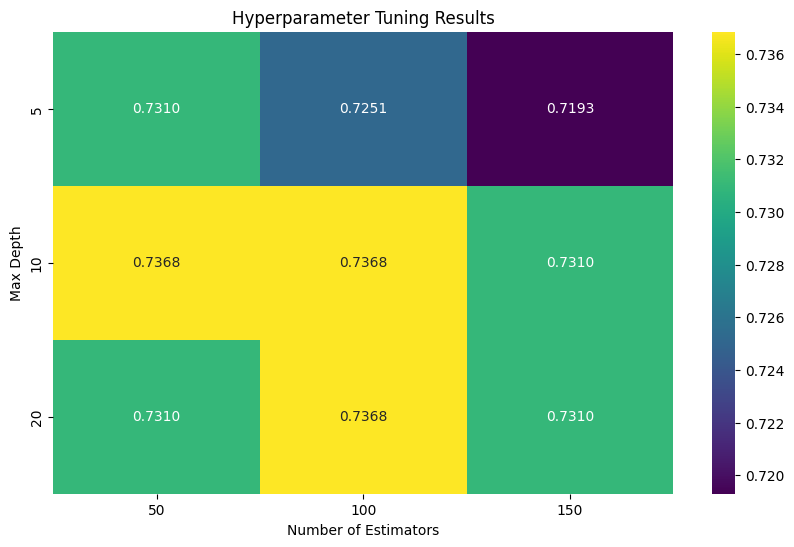

In [96]:
# Split Data into features and target
X = scaled_glasstypePrediction.drop('Type', axis=1)
Y = scaled_glasstypePrediction['Type']

# Split Data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 20],
}

# Random Forest model
Random_forest = RandomForestClassifier(random_state=42)

# GridSearchCV
grid_search = GridSearchCV(estimator=Random_forest, param_grid=param_grid, cv=3, scoring='accuracy')

# Perform hyperparameter tuning
grid_search.fit(x_train, y_train)
y_pred = grid_search.predict(x_test)

# Accuracy
accuracy_random_forest_dataset2 = accuracy_score(y_test, y_pred)

# precision
precision = precision_score(y_test, y_pred, average='weighted')

# recall
recall = recall_score(y_test, y_pred, average='weighted')

# F1-score
f1 = f1_score(y_test, y_pred, average='weighted')

print("Final Accuracy:", accuracy_random_forest_dataset2*100, "precision =", precision, "recall =", recall, "f1 =", f1)

# Extract mean test scores and parameter values from grid search results
mean_test_scores = grid_search.cv_results_['mean_test_score']
params = grid_search.cv_results_['params']

# Reshape mean test scores to match the grid shape
mean_test_scores = mean_test_scores.reshape(len(param_grid['max_depth']), len(param_grid['n_estimators']))

# heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(mean_test_scores, annot=True, fmt='.4f', cmap='viridis', xticklabels=param_grid['n_estimators'], yticklabels=param_grid['max_depth'])
plt.xlabel('Number of Estimators')
plt.ylabel('Max Depth')
plt.title('Hyperparameter Tuning Results')
plt.show()

Random forest for Dataset 3

In [97]:
# Split Data into features and target
X = housePricePrediction.drop('TARGET(PRICE_IN_LACS)', axis=1)
Y = housePricePrediction['TARGET(PRICE_IN_LACS)']

# Split Data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 20],
    'max_features': ['sqrt', 'log2', None]
}

# Random Forest model for regression
Random_forest_regressor = RandomForestRegressor(random_state=42)

# GridSearchCV for regression
grid_search = GridSearchCV(estimator=Random_forest_regressor, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error')

# Perform hyperparameter tuning
grid_search.fit(x_train, y_train)
y_pred = grid_search.predict(x_test)
mse_random_forest_dataset3 = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse_random_forest_dataset3)

Mean Squared Error: 175161.02211746675


#2-AdaBoost

Adaboost dataset 1

In [98]:
# Split Data into features and target
X = scaled_data_banknote_authentication.drop('Class', axis=1)
Y = scaled_data_banknote_authentication['Class']

# Split Data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.1, 0.01, 0.001],
}

#  Random Forest model
Adaboost = AdaBoostClassifier(random_state=42)

# GridSearchCV
grid_search = GridSearchCV(estimator=Adaboost, param_grid=param_grid, cv=3, scoring='accuracy')

# Perform hyperparameter tuning
grid_search.fit(x_train, y_train)
y_pred = grid_search.predict(x_test)
# Accuracy
accuracy_Adaboost_dataset1 = accuracy_score(y_test, y_pred)
# precision
precision = precision_score(y_test, y_pred,average='weighted')

# recall
recall = recall_score(y_test, y_pred,average='weighted')

# F1-score
f1 = f1_score(y_test, y_pred,average='weighted')

print("Final Accuracy:", accuracy_Adaboost_dataset1*100,"precision = ",precision,"recall = ",recall,"f1 = ",f1)


Final Accuracy: 97.0909090909091 precision =  0.9709090909090909 recall =  0.9709090909090909 f1 =  0.9709090909090909


Adaboost dataset 2


In [99]:
# Split Data into features and target
X = scaled_glasstypePrediction.drop('Type',axis = 1)
Y = scaled_glasstypePrediction['Type']

# Split Data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.1, 0.01, 0.001],
}

#  Random Forest model
Adaboost = AdaBoostClassifier(random_state=42)

# GridSearchCV
grid_search = GridSearchCV(estimator=Adaboost, param_grid=param_grid, cv=3, scoring='accuracy')

# Perform hyperparameter tuning
grid_search.fit(x_train, y_train)
y_pred = grid_search.predict(x_test)
# Accuracy
accuracy_Adaboost_dataset2 = accuracy_score(y_test, y_pred)
# precision
precision = precision_score(y_test, y_pred,average='weighted')

# recall
recall = recall_score(y_test, y_pred,average='weighted')

# F1-score
f1 = f1_score(y_test, y_pred,average='weighted')

print("Final Accuracy:", accuracy_Adaboost_dataset2*100,"precision = ",precision,"recall = ",recall,"f1 = ",f1)

Final Accuracy: 69.76744186046511 precision =  0.6619438473063645 recall =  0.6976744186046512 f1 =  0.6710577644411103


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Adaboost dataset 3

In [100]:
# Split Data into features and target
X = housePricePrediction.drop('TARGET(PRICE_IN_LACS)', axis=1)
Y = housePricePrediction['TARGET(PRICE_IN_LACS)']

# Split Data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.1, 0.01, 0.001],
}

# Random Forest model for regression
Adaboost = AdaBoostRegressor(random_state=42)

# GridSearchCV for regression
grid_search = GridSearchCV(estimator=Adaboost, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error')

# Perform hyperparameter tuning
grid_search.fit(x_train, y_train)
y_pred = grid_search.predict(x_test)
mse_Adaboost_dataset3 = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse_Adaboost_dataset3)


Mean Squared Error: 123601.30539610042


#3-Gradient Boosting

Dataset 1

Final Accuracy: 100.0 precision =  1.0 recall =  1.0 f1 =  1.0


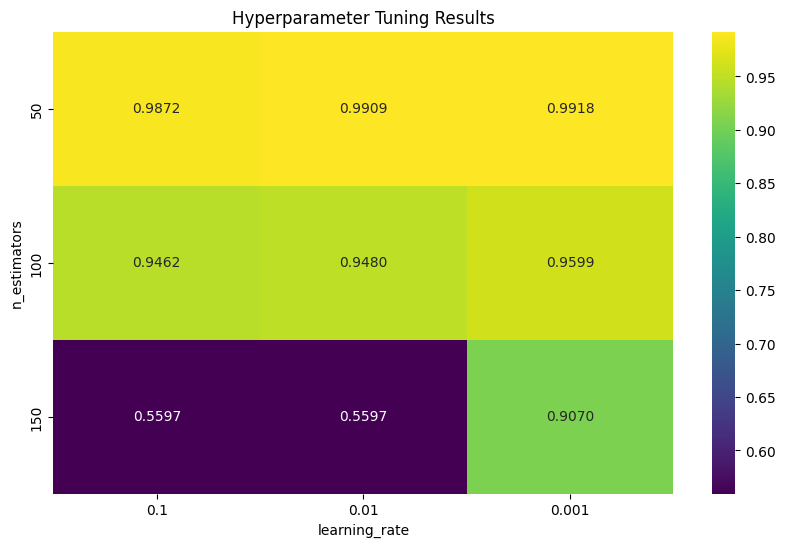

In [101]:
# Split Data into features and target
X = scaled_data_banknote_authentication.drop('Class', axis=1)
Y = scaled_data_banknote_authentication['Class']

# Split Data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.1, 0.01, 0.001],
}

#  Random Forest model
Gradient_boosting = GradientBoostingClassifier(random_state=42)

# GridSearchCV
grid_search = GridSearchCV(estimator=Gradient_boosting, param_grid=param_grid, cv=3, scoring='accuracy')

# Perform hyperparameter tuning
grid_search.fit(x_train, y_train)
y_pred = grid_search.predict(x_test)
# Accuracy
accuracy_Gradientboost_dataset1 = accuracy_score(y_test, y_pred)
# precision
precision = precision_score(y_test, y_pred,average='weighted')

# recall
recall = recall_score(y_test, y_pred,average='weighted')

# F1-score
f1 = f1_score(y_test, y_pred,average='weighted')

print("Final Accuracy:", accuracy_Gradientboost_dataset1*100,"precision = ",precision,"recall = ",recall,"f1 = ",f1)

results = grid_search.cv_results_

# Extract hyperparameters and their values
params = grid_search.param_grid
param_names = list(params.keys())
param_values = [params[name] for name in param_names]

# Extract mean test scores
mean_test_scores = results['mean_test_score']

# Reshape mean test scores to match the grid shape
grid_shape = [len(values) for values in param_values]
mean_test_scores = mean_test_scores.reshape(grid_shape)

# heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(mean_test_scores, annot=True, fmt='.4f', cmap='viridis', xticklabels=param_values[1], yticklabels=param_values[0])
plt.xlabel(param_names[1])
plt.ylabel(param_names[0])
plt.title('Hyperparameter Tuning Results')
plt.show()

Dataset 2

In [102]:
# Split Data into features and target
X = scaled_glasstypePrediction.drop('Type',axis = 1)
Y = scaled_glasstypePrediction['Type']


# Split Data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.1, 0.01, 0.001],
}

#  Random Forest model
Gradient_boosting = GradientBoostingClassifier(random_state=42)

# GridSearchCV
grid_search = GridSearchCV(estimator=Gradient_boosting, param_grid=param_grid, cv=3, scoring='accuracy')

# Perform hyperparameter tuning
grid_search.fit(x_train, y_train)
y_pred = grid_search.predict(x_test)
# Accuracy
accuracy_Gradientboost_dataset2 = accuracy_score(y_test, y_pred)
# precision
precision = precision_score(y_test, y_pred,average='weighted')

# recall
recall = recall_score(y_test, y_pred,average='weighted')

# F1-score
f1 = f1_score(y_test, y_pred,average='weighted')

print("Final Accuracy:", accuracy_Gradientboost_dataset2*100,"precision = ",precision,"recall = ",recall,"f1 = ",f1)

Final Accuracy: 86.04651162790698 precision =  0.8799372462163159 recall =  0.8604651162790697 f1 =  0.8501294328106912


Dataset 3

Mean Squared Error: 120975.6438646973


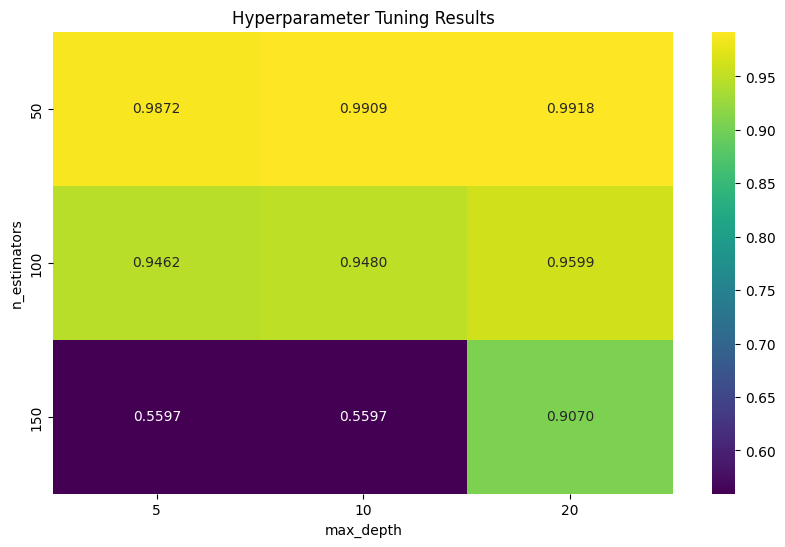

In [103]:
# Split Data into features and target
X = housePricePrediction.drop('TARGET(PRICE_IN_LACS)', axis=1)
Y = housePricePrediction['TARGET(PRICE_IN_LACS)']

# Split Data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 20],
}

# Random Forest model for regression
Gradient_boosting = GradientBoostingRegressor(random_state=42)

# GridSearchCV for regression
grid_search = GridSearchCV(estimator=Gradient_boosting, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error')

# Perform hyperparameter tuning
grid_search.fit(x_train, y_train)
y_pred = grid_search.predict(x_test)
mse_Gradient_boost_dataset3 = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

params = grid_search.param_grid
param_names = list(params.keys())
param_values = [params[name] for name in param_names]

# Extract mean test scores
mean_test_scores = results['mean_test_score']

# Reshape mean test scores to match the grid shape
grid_shape = [len(values) for values in param_values]
mean_test_scores = mean_test_scores.reshape(grid_shape)

# heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(mean_test_scores, annot=True, fmt='.4f', cmap='viridis', xticklabels=param_values[1], yticklabels=param_values[0])
plt.xlabel(param_names[1])
plt.ylabel(param_names[0])
plt.title('Hyperparameter Tuning Results')
plt.show()


# **Visualization:**

# Accuracy Comparison Bar Chart:

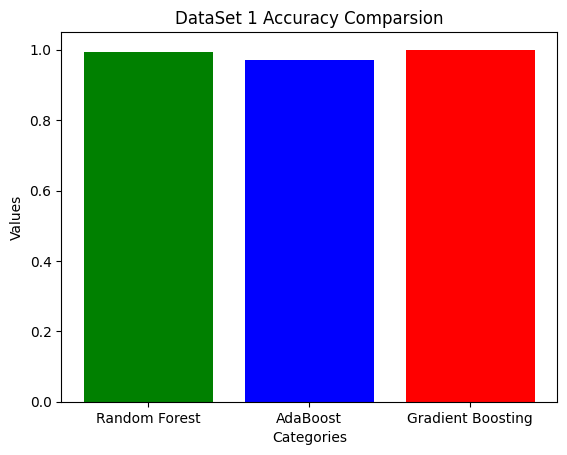

In [104]:
categories = ["Random Forest","AdaBoost","Gradient Boosting"]
values = [accuracy_random_forest_dataset1,accuracy_Adaboost_dataset1,accuracy_Gradientboost_dataset1]

plt.bar(categories, values,color=["green","blue","red"])

plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('DataSet 1 Accuracy Comparsion')
plt.show()

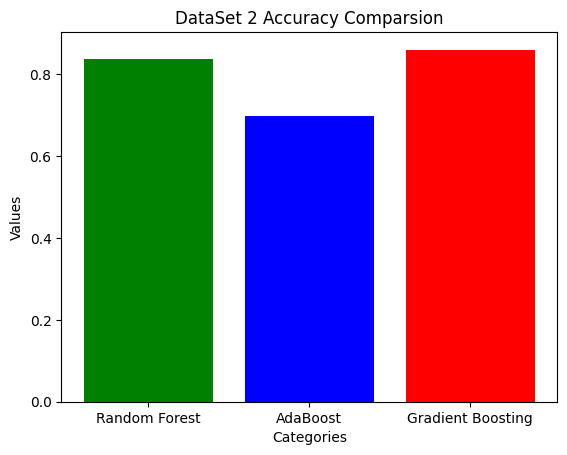

In [105]:
categories = ["Random Forest","AdaBoost","Gradient Boosting"]
values = [accuracy_random_forest_dataset2,accuracy_Adaboost_dataset2,accuracy_Gradientboost_dataset2]

plt.bar(categories, values,color=["green","blue","red"])

plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('DataSet 2 Accuracy Comparsion')
plt.show()

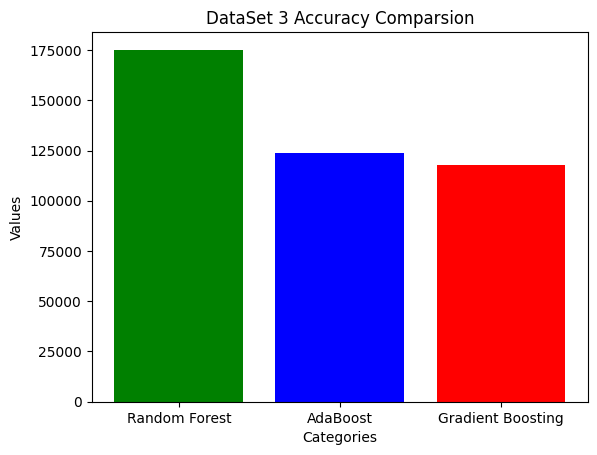

In [106]:
categories = ["Random Forest","AdaBoost","Gradient Boosting"]
values = [mse_random_forest_dataset3,mse_Adaboost_dataset3,mse_Gradient_boost_dataset3]

plt.bar(categories, values,color=["green","blue","red"])

plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('DataSet 3 Accuracy Comparsion')
plt.show()